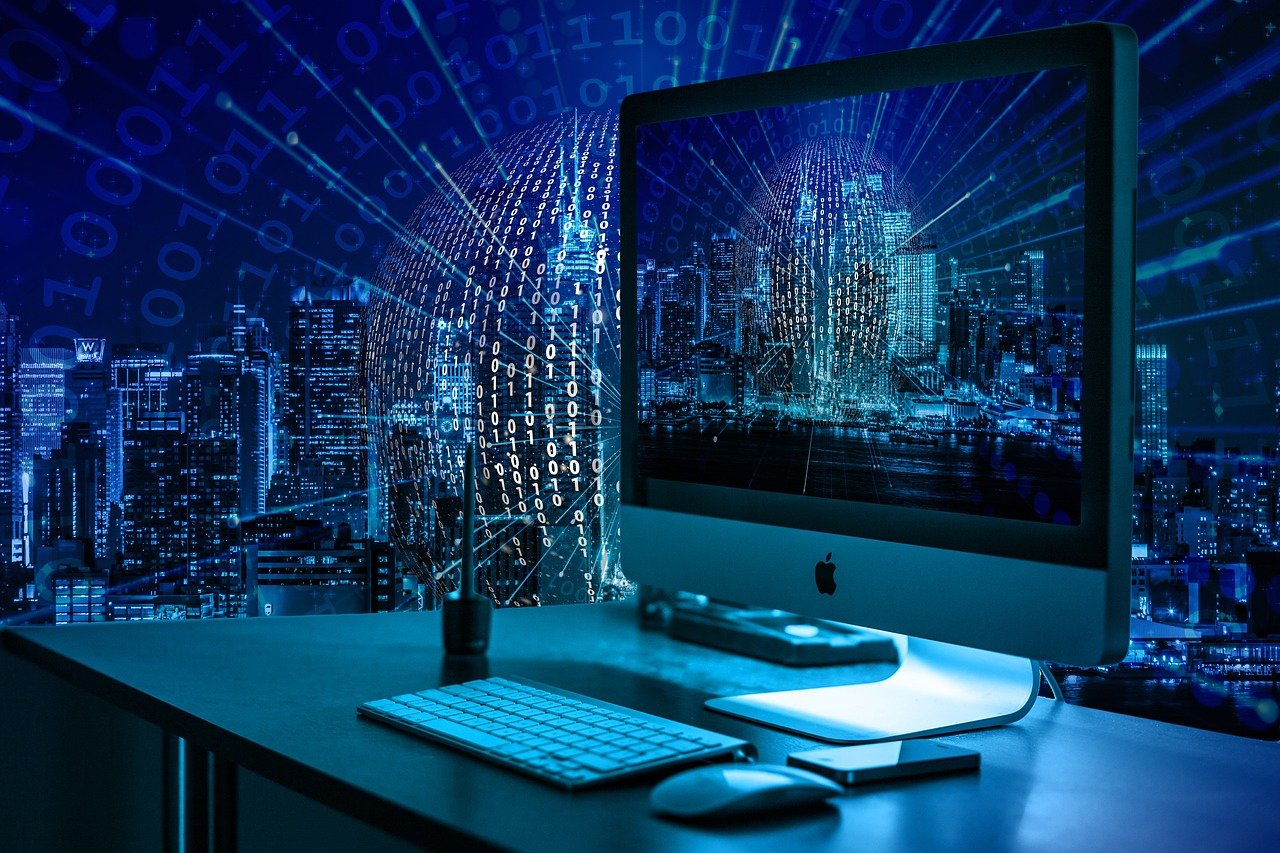

Computer and Internet are one of the greatest Invention of Mankind.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML
import plotly.graph_objects as go
pd.set_option('display.max_rows',20000, 'display.max_columns',100)


## Location World

In [ ]:
location_world = pd.read_csv("../input/locationworld/LOCATION.csv")
location_world.head()

## Computer Usage

In [ ]:
computer_home = pd.read_csv("../input/access-to-computers-from-home-oecd/DP_LIVE_04122020114826086.csv")
computer_home = computer_home.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1)
computer_home = computer_home.rename(columns={'Value':'Computer'})

computer_home.head()

In [ ]:
#Merging Two Data Frame
computer_home_overall=pd.merge(computer_home,location_world,on='LOCATION')
computer_home_overall.head()

## Around the World Growth of Computer

In [ ]:
fig = px.scatter_geo(computer_home_overall, locations="LOCATION", color="CONTINENT", hover_name="Country Name", size="Computer",
               animation_frame="TIME", projection="natural earth")
fig.update_layout(
    title='Around the World Growth of Computer')
fig.show()

## Internet Usage

In [ ]:
internet_home = pd.read_csv("../input/internet-access-oecd/DP_LIVE_25112020170111306.csv")
internet_home = internet_home.drop(['INDICATOR','SUBJECT','MEASURE','FREQUENCY','Flag Codes'],axis=1)
internet_home = internet_home.rename(columns={'Value':'Internet'})
internet_home.head()

In [ ]:
#Merging Two Data Frame
internet_home_overall=pd.merge(internet_home,location_world,on='LOCATION')
internet_home_overall.head()

## Around the World Growth of Internet

In [ ]:
fig = px.scatter_geo(internet_home_overall, locations="LOCATION", color="CONTINENT", hover_name="Country Name", size="Internet",
               animation_frame="TIME", projection="natural earth")
fig.update_layout(
    title='Around the World Growth of Internet')
fig.show()

## Merging Three Dataframe

In [ ]:
#Merging Three Dataframe
Co_In= computer_home.merge(location_world,on='LOCATION').merge(internet_home,on=["LOCATION", "TIME"])
Co_In.head()

In [ ]:
Co_In = Co_In.drop(['LOCATION','LATITUDE','LONGITUDE'],axis=1)
Co_In.head()

## Column change

In [ ]:
Co_In = Co_In[['Country Name','CONTINENT','TIME','Computer','Internet']]
Co_In.head()

## Computer Vs Internet

In [ ]:
fig = px.scatter(Co_In, x="Computer", y="Internet", color="TIME")
fig.update_layout(
    title='With Increase in Computer there is High-Usage of Internet')
fig.show()

## w.r.t Dataset Continentwise Computer Growth 

In [ ]:
fig = px.scatter(Co_In, x="Computer", y="Computer", animation_frame="TIME", animation_group="Country Name",
           size="Computer", color="CONTINENT", hover_name="Country Name", facet_col="CONTINENT",log_x=True, size_max=45, range_x=[5,1000], range_y=[1,110])
fig.update_layout(
    title='w.r.t Dataset Continentwise Computer Growth ')
fig.show()

## w.r.t Dataset Countrywise Computer Growth 

In [ ]:
fig = px.area(Co_In, x="TIME", y="Computer", color="CONTINENT", line_group="Country Name")
fig.update_layout(
    title='w.r.t Dataset Countrywise Computer Growth ')
fig.show()

## w.r.t Dataset Continentwise Internet Growth 

In [ ]:
fig = px.scatter(Co_In, x="Internet", y="Computer", animation_frame="TIME", animation_group="Country Name",
           size="Computer", color="CONTINENT", hover_name="Country Name", facet_col="CONTINENT",log_x=True, size_max=45, range_x=[5,1000], range_y=[1,110])
fig.update_layout(
    title='w.r.t Dataset Continentwise Internet Growth ')
fig.show()

## w.r.t Dataset Countrywise Internet Growth

In [ ]:
fig = px.area(Co_In, x="TIME", y="Internet", color="CONTINENT", line_group="Country Name")
fig.update_layout(
    title='w.r.t Dataset Countrywise Internet Growth ')
fig.show()

## Running Bar Chart

In [ ]:
table_computer = pd.pivot_table(Co_In, values ='Computer', index =['CONTINENT','Country Name'], 
                         columns =['TIME'], aggfunc = np.sum)
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/4570975"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
table_internet = pd.pivot_table(Co_In, values ='Internet', index =['CONTINENT','Country Name'], 
                         columns =['TIME'], aggfunc = np.sum)

HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/4571089"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

## Highest Usage of Computers by Countries wrt to Year in their Continent

In [ ]:
Co_In_Special_Computers= Co_In.iloc[Co_In.groupby(['TIME','CONTINENT'])['Computer'].idxmax()][['Country Name','CONTINENT','TIME','Computer']]

fig = px.scatter(Co_In_Special_Computers, y="TIME", x="Country Name", color="Computer")
fig.update_xaxes(tickangle=270, tickfont=dict(size=14))
fig.update_layout(
    title='Highest Usage of Computers by Countries wrt to Year in their Continent')
fig.show()

## Highest Usage of Internet by Countries wrt to Year in their Continent

In [ ]:
Co_In_Special_Internet= Co_In.iloc[Co_In.groupby(['TIME','CONTINENT'])['Internet'].idxmax()][['Country Name','CONTINENT','TIME','Internet']]

fig = px.scatter(Co_In_Special_Internet, y="TIME", x="Country Name", color="Internet")
fig.update_xaxes(tickangle=270, tickfont=dict(size=14))
fig.update_layout(
    title='Highest Usage of Internet by Countries wrt to Year in their Continent')
fig.show()

# If you Liked. Kindly Vote